# **LeNet-5**

In [1]:
!ls ../input/Kannada-MNIST

Dig-MNIST.csv  sample_submission.csv  test.csv	train.csv


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# %tensorflow_version 1.x
import tensorflow
print(tensorflow.__version__)
import tensorflow.keras as keras
print(keras.__version__)

2.0.0
2.2.4-tf


In [3]:
train_set = pd.read_csv("../input/Kannada-MNIST/train.csv")
# print(type(train_set))
train_array = train_set.values
y_train, x_train = train_array[:, :1], train_array[:, 1:]
# print(y_train, y_train.shape,"\n", x_train, x_train.shape)
# print(x_train.dtype, x_train.min(), x_train.max())

In [4]:
test_set = pd.read_csv("../input/Kannada-MNIST/test.csv")
# print(type(test_set))
test_array = test_set.values
y_test, x_test = test_array[:, :1], test_array[:, 1:]

Нармалізацыя

In [5]:
from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler((-1, 1), False)
scaler = MinMaxScaler((0, 1), False)
print(scaler.fit(x_train))
# print(scaler.data_max_)
x_train = scaler.transform(x_train)
# print(scaler.data_max_)
# print(x_train)
print(x_train.min(), x_train.max())

MinMaxScaler(copy=False, feature_range=(0, 1))
0.0 1.0


І для тэставых

In [6]:
print(x_test.min(), x_test.max())
scaler = MinMaxScaler((0, 1), False)
scaler.fit(x_test)
x_test = scaler.transform(x_test)
print(x_test.min(), x_test.max())

0 255
0.0 1.0


Б'ем на трэйн і валідацыю

In [7]:
border = 50000
x_train, x_valid, y_train, y_valid = x_train[:border], x_train[border:], y_train[:border], y_train[border:]

Пераўтвараем у патрэбны 4Д-фармат

In [8]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train, 10)
y_valid = np_utils.to_categorical(y_valid, 10)

print(x_train.shape)
print(x_valid.shape)
x_train = x_train.reshape(x_train.shape[0], 28,28,1)
# print(x_train)
x_valid = x_valid.reshape(x_valid.shape[0], 28,28,1)

x_test = x_test.reshape(x_test.shape[0], 28,28,1)
print(x_train.shape)
print(x_valid.shape)

(50000, 784)
(10000, 784)
(50000, 28, 28, 1)
(10000, 28, 28, 1)


Using TensorFlow backend.


Будуем архітэктуру

In [22]:
from keras.models import Sequential
from keras import models, layers, optimizers
# import keras

from keras.callbacks import CSVLogger, ModelCheckpoint
from matplotlib import pyplot

pyplot.rcParams["figure.figsize"] = (20,10)

BATCH_SIZE = 16
EPOCHS = 10
LRATE = 0.01

def fit_model(x_tr, y_tr, x_val, y_val, lrate=LRATE, batch=BATCH_SIZE, plot=False, parameter_name=None, parameter_value=None):
  model = Sequential()
  model.add(layers.Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=(28,28,1),
                          padding='same'))
  model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid'))
  model.add(layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))
  model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
  model.add(layers.Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))
  #Flatten the CNN output so that we can connect it with fully connected layers
  model.add(layers.Flatten())
  model.add(layers.Dense(84, activation='tanh'))
  model.add(layers.Dense(10, activation='softmax'))
  opt = optimizers.SGD(lr=lrate)
  model.compile(loss=keras.losses.categorical_crossentropy, optimizer=opt, metrics=['accuracy'])

  history = model.fit(x_tr, y_tr, batch_size=BATCH_SIZE, epochs=EPOCHS,
          verbose=2,
          # validation_data=(x_valid - 0.5, y_valid),
          validation_data=(x_val, y_val),
          # callbacks=[
          #     CSVLogger('log.csv'),
          #     ModelCheckpoint('model.h5', save_best_only=True),
          # ]
          )
  if plot:
    pyplot.plot(history.history['accuracy'], label='train')
    pyplot.plot(history.history['val_accuracy'], label='test')
    pyplot.title(f'{parameter_name}='+str(parameter_value), pad=-50)
    plt.legend(['Train', 'Test'], loc='upper left')
  
  return model
# model.summary()

Вучым на стандартных параметрах

In [ ]:
lrate = 0.01
fit_model(x_train, y_train, x_valid, y_valid, lrate)



In [0]:
# model = keras.models.load_model('model.h5')

# pred_probas = model.predict(x_test - 0.5, batch_size=16)
pred_probas = model.predict(x_test, batch_size=BATCH_SIZE)

prediction = pred_probas.argmax(axis=1)


In [0]:
submission = pd.read_csv('../input/Kannada-MNIST/sample_submission.csv')
submission['label'] = prediction
submission.to_csv("submission.csv",index=False)

## Эксперыменты 

з lrate

In [0]:
learning_rates = [1, 0.5, 0.1, 0.01]
for i in range(len(learning_rates)):
	# determine the plot number
	plot_no = 420 + (i+1)
	pyplot.subplot(plot_no)
	# fit model and plot learning curves for a learning rate
	fit_model(x_train, y_train, x_valid, y_valid, learning_rates[i],plot=True, "lrate", learning_rates[i])
# show learning curves
pyplot.show()

З batch_size

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 62s 1ms/step - loss: 0.2088 - accuracy: 0.9442 - val_loss: 0.0710 - val_accuracy: 0.9806
Epoch 2/10
50000/50000 [==============================] - 61s 1ms/step - loss: 0.0914 - accuracy: 0.9731 - val_loss: 0.0542 - val_accuracy: 0.9850
Epoch 3/10
50000/50000 [==============================] - 61s 1ms/step - loss: 0.0681 - accuracy: 0.9811 - val_loss: 0.0470 - val_accuracy: 0.9860
Epoch 4/10
50000/50000 [==============================] - 59s 1ms/step - loss: 0.0550 - accuracy: 0.9847 - val_loss: 0.0394 - val_accuracy: 0.9881
Epoch 5/10
50000/50000 [==============================] - 59s 1ms/step - loss: 0.0461 - accuracy: 0.9875 - val_loss: 0.0340 - val_accuracy: 0.9898
Epoch 6/10
50000/50000 [==============================] - 62s 1ms/step - loss: 0.0395 - accuracy: 0.9896 - val_loss: 0.0313 - val_accuracy: 0.9911
Epoch 7/10
50000/50000 [==============================] - 62s 1ms/st

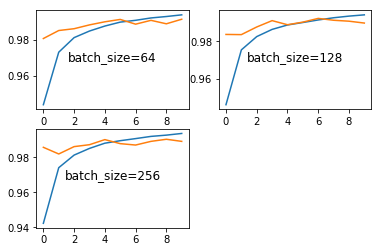

In [20]:
lrate = 0.01
batch_sizes = [4, 8, 16, 32]
# batch_sizes = [64, 128, 256]

for i in range(len(batch_sizes)):
	# determine the plot number
	plot_no = 220 + (i+1)
	pyplot.subplot(plot_no)
	# fit model and plot learning curves for a learning rate
	fit_model(x_train, y_train, x_valid, y_valid,lrate=lrate, batch=batch_sizes[i],plot=True, parameter_name="batch_size", parameter_value=batch_sizes[i])
# show learning curves
pyplot.show()


## **Розныя аптымізатары**

In [39]:
pyplot.rcParams["figure.figsize"] = (20,20)

BATCH_SIZE = 16
EPOCHS = 20

def fit_model_opt(x_tr, y_tr, x_val, y_val, optimizer, opt_name, plot=True):
    print(opt_name)
    model = Sequential()
    model.add(layers.Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=(28,28,1),
                          padding='same'))
    model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid'))
    model.add(layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))
    model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
    model.add(layers.Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))
    #Flatten the CNN output so that we can connect it with fully connected layers
    model.add(layers.Flatten())
    model.add(layers.Dense(84, activation='tanh'))
    model.add(layers.Dense(10, activation='softmax'))
    opt = optimizer
    model.compile(loss=keras.losses.categorical_crossentropy, optimizer=opt, metrics=['accuracy'])

    history = model.fit(x_tr, y_tr, batch_size=BATCH_SIZE, epochs=EPOCHS,
          verbose=2,
          # validation_data=(x_valid - 0.5, y_valid),
          validation_data=(x_val, y_val),
          callbacks=[
              CSVLogger(f'logs/log_{opt_name}.csv'),
              ModelCheckpoint(f'models/model_{opt_name}.h5', save_best_only=True),
          ]
          )
    if plot:
        pyplot.plot(history.history['accuracy'], label='train')
        pyplot.plot(history.history['val_accuracy'], label='test')
        pyplot.title(f'{opt_name}', pad=-50)
        pyplot.legend(['Train', 'Test'], loc='upper left')

    return model

In [ ]:
list_optimizers = {"SGD_vanilla": optimizers.SGD(), 'SGD_momentum_0.5': optimizers.SGD(momentum=0.5),'SGD_momentum_0.9': optimizers.SGD(momentum=0.9),
                   "Adadelta": optimizers.Adadelta(), "Adam": optimizers.Adam(), 'RMSprop': optimizers.RMSprop()}
# list_optimizers = {"SGD_vanilla": optimizers.SGD(), 'SGD_momentum_0.5': optimizers.SGD(momentum=0.5)}

for i, opt_name in enumerate(list_optimizers):
	# determine the plot number
	plot_no = 620 + (i+1)
	pyplot.subplot(plot_no)
	# fit model and plot learning curves for a learning rate
	fit_model_opt(x_train, y_train, x_valid, y_valid, list_optimizers[opt_name], opt_name)
# show learning curves
pyplot.show()

SGD_vanilla
Train on 50000 samples, validate on 10000 samples
Epoch 1/20
 - 60s - loss: 0.2110 - accuracy: 0.9447 - val_loss: 0.0616 - val_accuracy: 0.9836
Epoch 2/20
 - 60s - loss: 0.0883 - accuracy: 0.9747 - val_loss: 0.0449 - val_accuracy: 0.9874
Epoch 3/20
 - 62s - loss: 0.0656 - accuracy: 0.9815 - val_loss: 0.0419 - val_accuracy: 0.9877
Epoch 4/20
 - 62s - loss: 0.0520 - accuracy: 0.9850 - val_loss: 0.0420 - val_accuracy: 0.9868
Epoch 5/20
 - 59s - loss: 0.0431 - accuracy: 0.9884 - val_loss: 0.0353 - val_accuracy: 0.9899
Epoch 6/20
 - 58s - loss: 0.0366 - accuracy: 0.9897 - val_loss: 0.0292 - val_accuracy: 0.9919
Epoch 7/20
 - 59s - loss: 0.0319 - accuracy: 0.9909 - val_loss: 0.0355 - val_accuracy: 0.9891
Epoch 8/20
 - 60s - loss: 0.0279 - accuracy: 0.9925 - val_loss: 0.0320 - val_accuracy: 0.9901
Epoch 9/20
 - 60s - loss: 0.0247 - accuracy: 0.9934 - val_loss: 0.0311 - val_accuracy: 0.9904
Epoch 10/20
 - 63s - loss: 0.0217 - accuracy: 0.9943 - val_loss: 0.0346 - val_accuracy: 0.98

In [35]:
!ls logs